# Quality Prediction of Red Wine and White Wine Based on Physicochemical Tests


##  Introduction


Wine is an alcoholic beverage made from the process of fermenting grapes with yeast to create a drink that is a 7 billion dollar industry in Canada ([Statistics Canada](https://www150.statcan.gc.ca/n1/daily-quotidien/170502/dq170502a-eng.htm)). White wine and red wine are two variants of wine that is widely known. Red wine is made from dark-colored grape varieties, while white wine is made from non-colored grape pulp ([Wikipedia](https://en.wikipedia.org/wiki/Wine)). Physicochemical properties (such as pH and acidity) depend on many different environmental factors (like climate and soil composition) ([Decanter](https://www.decanter.com/learn/wset/factors-that-influence-wine-conditions-and-growing-environment-wset-level-2-282900/)) that affect the taste and quality of wine. Knowing which concentrations of chemicals that make up a good wine could be useful to somebody that is involved in the production or selling of wine by giving them knowledge that could help them decide to make or sell specific wines based on their chemical compositions. This brings us to our question: can we accurately predict the quality of red and whites wines with a k-nn regression model based on the results of the physicochemical tests?

The two seperate data sets that we will be working with are related to the red and white variants of the Portuguese "Vinho Verde" wine. They both contain 11 physicochemical parameters (fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH,  sulphates, alcohol) and the quality index on a scale of 0-10. The red wine and white wine data sets have 1599 and 4898 samples respectively with a distrubtion of average wines being more common and poor/superb wines being uncommon.   


## Methods and Results

In [2]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(caret)
install.packages("e1071")
library(e1071)
install.packages("GGally")
library(GGally)
install.packages("gridExtra")
library(gridExtra)
install.packages("ROSE")
library(ROSE)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘testthat’

The following object is masked from ‘package:dplyr’:

    matches

The following object is masked from ‘package:purrr’:

    is_null

Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)
Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)

Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa

Installing package into ‘/home

The data sets were downloaded from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/), placed in the same folder that this notebook is in and read in using read.csv with the semi-colon as the separater argument.

In [3]:
# Import Red wine data
red_data <- read.csv("winequality-red.csv", sep = ";") 
head(red_data)

# Import white wine data
white_data <- read.csv("winequality-white.csv", sep = ";")
head(white_data)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6


_Table 1_

Since both of the data sets are already in a tidy format, we can leave them as is. However, since we are doing regression to answer our question, we need to scale the variables. 

In [4]:
# Scale the data
red_scaled <- red_data %>% 
  select(-quality) %>% 
  scale(center = FALSE) 

red_scaled <- data.frame(quality = red_data$quality, red_scaled)
head(red_scaled)

white_scaled <- white_data %>% 
  select(-quality) %>% 
  scale(center = FALSE) 

white_scaled <- data.frame(quality = white_data$quality, white_scaled)
head(white_scaled)

quality,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
5,0.8703407,1.255555,0.0000000,0.6541052,0.7649761,0.5784783,0.5970695,1.0007419,1.0585855,0.8237400,0.8968984
5,0.9173862,1.578412,0.0000000,0.8950914,0.9864165,1.3147233,1.1765782,0.9997389,0.9650922,1.0002557,0.9350642
5,0.9173862,1.363174,0.1198329,0.7918116,0.9260236,0.7888340,0.9482869,0.9999395,0.9831877,0.9561268,0.9350642
6,1.3172725,0.502222,1.6776605,0.6541052,0.7549106,0.8940119,1.0536521,1.0009425,0.9530286,0.8531593,0.9350642
5,0.8703407,1.255555,0.0000000,0.6541052,0.7649761,0.5784783,0.5970695,1.0007419,1.0585855,0.8237400,0.8968984
5,0.8703407,1.183809,0.0000000,0.6196787,0.7549106,0.6836561,0.7024347,1.0007419,1.0585855,0.8237400,0.8968984


quality,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
6,1.0134309,0.9122795,1.0127692,2.5367895,0.8871633,1.1481392,1.1744078,1.0069072,0.9398009,0.8946063,0.8311998
6,0.9120878,1.0136438,0.9565042,0.1960804,0.9660223,0.3571989,0.9118931,0.9998658,1.0337810,0.9741268,0.8973179
6,1.1726843,0.9460676,1.1252991,0.8455965,0.9857370,0.7654261,0.6701032,1.0009723,1.0212503,0.8747261,0.9539906
6,1.0423861,0.7771269,0.9002393,1.0416769,1.1434550,1.1991676,1.2849402,1.0014753,0.9993216,0.7952056,0.9350997
6,1.0423861,0.7771269,0.9002393,1.0416769,1.1434550,1.1991676,1.2849402,1.0014753,0.9993216,0.7952056,0.9350997
6,1.1726843,0.9460676,1.1252991,0.8455965,0.9857370,0.7654261,0.6701032,1.0009723,1.0212503,0.8747261,0.9539906


_Table 2_

%% performs a summary of the data set that is relevant for exploratory data analysis related to the planned classification, regression or clustering analysis 

In [5]:
# See the distribution of quality level
red_data %>% 
    group_by(quality) %>%
    summarize(n = n()) %>% 
    data.frame()
nrow(red_data)

white_data %>%
    group_by(quality) %>%
    summarize(n=n()) %>% 
    data.frame()
nrow(white_data)

quality,n
3,10
4,53
5,681
6,638
7,199
8,18


[1] 1599

quality,n
3,20
4,163
5,1457
6,2198
7,880
8,175
9,5


[1] 4898

_Table 3_

From the table above we can see that every observation has a quality level (i.e. no observation with quality unknown).

For our exploratory data analysis, we are going to graph the relationships between each of the physicochemical variables vs. the quality of the wine using box plots to see which predictors could possibly be useful in making our model.

Here are the exploratory plots for the red wine. 

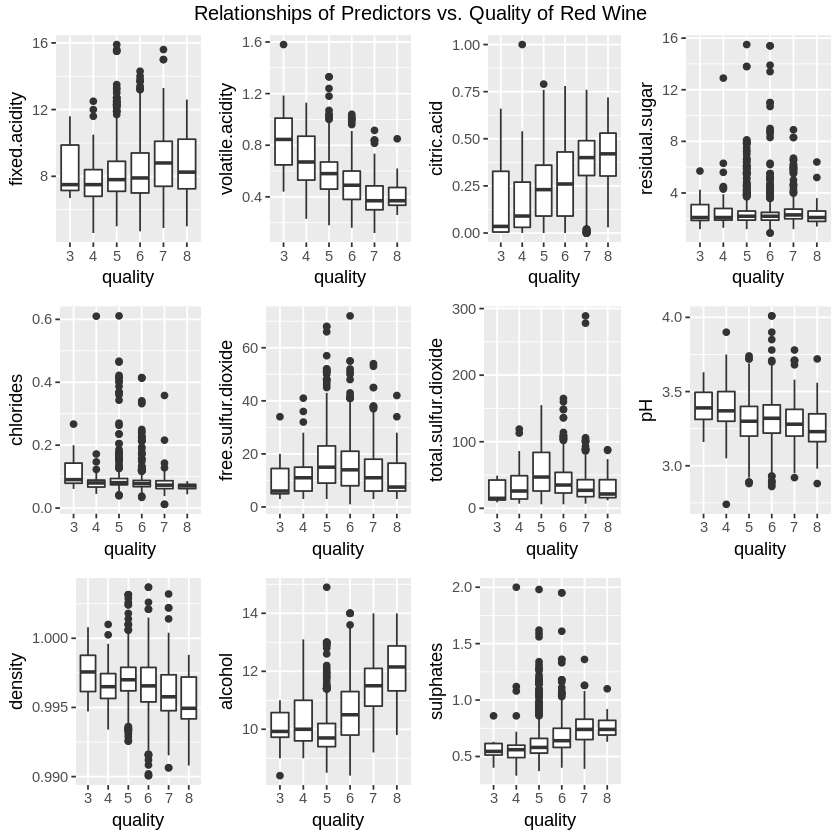

In [144]:
red_data_quality_factor <- red_data %>%
    mutate(quality = as.factor(quality))

plot_fa <- red_data_quality_factor %>% 
    ggplot(aes(x = quality, y = fixed.acidity)) + 
    geom_boxplot()

plot_va <- red_data_quality_factor %>% 
    ggplot(aes(x = quality, y = volatile.acidity)) +
    geom_boxplot()

plot_ca <- red_data_quality_factor %>% 
    ggplot(aes(x = quality, y = citric.acid)) +
    geom_boxplot()

plot_rs <- red_data_quality_factor %>%  
    ggplot(aes(x = quality, y = residual.sugar)) +
    geom_boxplot()

plot_cl <- red_data_quality_factor %>% 
    ggplot(aes(x = quality, y = chlorides)) +
    geom_boxplot()

plot_fsd <- red_data_quality_factor %>% 
    ggplot(aes(x = quality, y = free.sulfur.dioxide)) +
    geom_boxplot()

plot_tsd <- red_data_quality_factor %>% 
    ggplot(aes(x = quality, y = total.sulfur.dioxide)) +
    geom_boxplot()

plot_ph <- red_data_quality_factor %>%  
    ggplot(aes(x = quality, y = pH)) +
    geom_boxplot()

plot_den <- red_data_quality_factor %>% 
    ggplot(aes(x = quality, y = density)) +
    geom_boxplot()

plot_alc <- red_data_quality_factor %>% 
    ggplot(aes(x = quality, y = alcohol)) +
    geom_boxplot()

plot_sulp <- red_data_quality_factor %>% 
    ggplot(aes(x = quality, y = sulphates)) +
    geom_boxplot()


grid.arrange(plot_fa, plot_va, plot_ca, plot_rs, plot_cl, plot_fsd, plot_tsd, plot_ph, plot_den, plot_alc, plot_sulp, ncol = 4, top = "Relationships of Predictors vs. Quality of Red Wine")

_Figure 1_

Judging from the results of the boxplots, volatile acidity, citric acid, and alcohol content should be good predictors to use because of the lower number of outliers compared to other predictors and some sort of visible relationship between the predictor and wine quality. 

Doing the same exploratory data analysis with the white wine data set. 

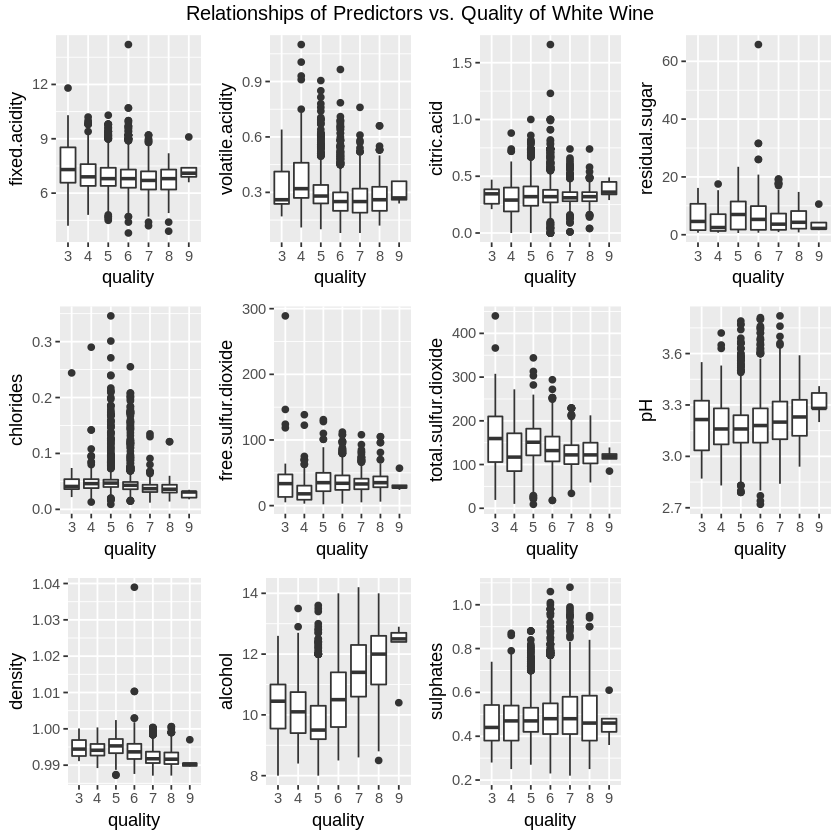

In [145]:
white_data_quality_factor <- white_data %>%
    mutate(quality = as.factor(quality))

plot_fa <- white_data_quality_factor %>% 
    ggplot(aes(x = quality, y = fixed.acidity)) + 
    geom_boxplot()

plot_va <- white_data_quality_factor %>% 
    ggplot(aes(x = quality, y = volatile.acidity)) +
    geom_boxplot()

plot_ca <- white_data_quality_factor %>% 
    ggplot(aes(x = quality, y = citric.acid)) +
    geom_boxplot()

plot_rs <- white_data_quality_factor %>%  
    ggplot(aes(x = quality, y = residual.sugar)) +
    geom_boxplot()

plot_cl <- white_data_quality_factor %>% 
    ggplot(aes(x = quality, y = chlorides)) +
    geom_boxplot()

plot_fsd <- white_data_quality_factor %>% 
    ggplot(aes(x = quality, y = free.sulfur.dioxide)) +
    geom_boxplot()

plot_tsd <- white_data_quality_factor %>% 
    ggplot(aes(x = quality, y = total.sulfur.dioxide)) +
    geom_boxplot()

plot_ph <- white_data_quality_factor %>%  
    ggplot(aes(x = quality, y = pH)) +
    geom_boxplot()

plot_den <- white_data_quality_factor %>% 
    ggplot(aes(x = quality, y = density)) +
    geom_boxplot()

plot_alc <- white_data_quality_factor %>% 
    ggplot(aes(x = quality, y = alcohol)) +
    geom_boxplot()

plot_sulp <- white_data_quality_factor %>% 
    ggplot(aes(x = quality, y = sulphates)) +
    geom_boxplot()

grid.arrange(plot_fa, plot_va, plot_ca, plot_rs, plot_cl, plot_fsd, plot_tsd, plot_ph, plot_den, plot_alc, plot_sulp, ncol = 4, top = "Relationships of Predictors vs. Quality of White Wine")

_Figure 2_

Also looking at these boxplots, residual sugar, density, and alcohol content should be good predictors to use because of the lower outliers compared to other predictors and some sort of visible relationship between the predictor and wine quality. 

## KNN Regression with Physicochemical Variables

### Red Wine

First, we will do k-nn regression on the red wine data set using all the physicochemical variables as predictors as a control model to later compare it to other models that will make to see if we have improved. 

Here, we split the red wine data set into training and testing sets using an 80/20 split. 

In [7]:
set.seed(100)

training_rows <- red_scaled %>% 
    select(quality) %>% 
    unlist() %>% 
    createDataPartition(p = 0.80, list = FALSE)

X_train <- training_rows %>% 
    select(-quality) %>% 
    slice(training_rows) %>% 
    data.frame()

Y_train <- training_rows %>% 
    select(quality) %>% 
    slice(training_rows) %>% 
    unlist()

X_test <- training_rows %>% 
    select(-quality) %>% 
    slice(-training_rows) %>% 
    data.frame()

Y_test <- training_rows %>% 
    select(quality) %>% 
    slice(-training_rows) %>% 
    unlist()

Using 10 fold cross validation to find the best value of k to use. 

In [8]:
set.seed(100)

train_control <- trainControl(method = "cv", number = 10)

k_red = data.frame(k = seq(from = 1, to = 50, by = 1))

knn_red <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k_red, trControl = train_control)

knn_red

k-Nearest Neighbors 

1281 samples
  11 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1153, 1152, 1152, 1154, 1154, 1153, ... 
Resampling results across tuning parameters:

  k   RMSE       Rsquared   MAE      
   1  0.7975416  0.2501362  0.4684284
   2  0.7466745  0.2470331  0.5231170
   3  0.7283019  0.2420591  0.5448059
   4  0.7164770  0.2451099  0.5482398
   5  0.7115841  0.2427249  0.5479540
   6  0.7035250  0.2517749  0.5455386
   7  0.6963584  0.2612551  0.5389980
   8  0.6949164  0.2616176  0.5424115
   9  0.6925330  0.2640492  0.5458515
  10  0.6900828  0.2665583  0.5445147
  11  0.6879881  0.2703780  0.5437551
  12  0.6839562  0.2781686  0.5429961
  13  0.6830984  0.2788136  0.5425267
  14  0.6807511  0.2829661  0.5418957
  15  0.6805427  0.2828378  0.5413993
  16  0.6816772  0.2806594  0.5425618
  17  0.6831690  0.2775737  0.5443973
  18  0.6812243  0.2821486  0.5435638
  19  0.6832611  0.2782056  0.5447006
  20  0.6839267  0.2

The k that gives the lowest RMSE is 15, so that is the k we will use to form the final k-nn regression model with all the variabled as predictors. 

In [9]:
set.seed(100)
k_best_red <- data.frame(k = 15)
knn_red <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k_best_red)
knn_red

k-Nearest Neighbors 

1281 samples
  11 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 1281, 1281, 1281, 1281, 1281, 1281, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.7097263  0.2335073  0.5591935

Tuning parameter 'k' was held constant at a value of 15

Testing the final model on the test data. 

In [90]:
set.seed(100)
test <- predict(knn_red, X_test)

predictions <- data.frame(obs = Y_test, pred = test)

test_error <- defaultSummary(predictions)
test_error

RMSE  Rsquared       MAE 
0.6895984 0.3226301 0.5506844

_Table 4_

The RMSPE for using all the variables in the red wine data set is 0.68959. Considering that the range of qualities is from 3 to 8, the error is quite large. Let's try to reduce it using the predictors that we determined should be good.

Using the predictors that look good on the red wine data: volatile acidity, citric acidity, and alcohol.

In [13]:
set.seed(100)

training_rows <- red_scaled %>% 
    select(quality) %>% 
    unlist() %>% 
    createDataPartition(p = 0.80, list = FALSE)

X_train <- red_scaled %>% 
    select(volatile.acidity, citric.acid, alcohol) %>% 
    slice(training_rows) %>% 
    data.frame()

Y_train <- red_scaled %>% 
    select(quality) %>% 
    slice(training_rows) %>% 
    unlist()

X_test <- red_scaled %>% 
    select(volatile.acidity, citric.acid, alcohol) %>% 
    slice(-training_rows) %>% 
    data.frame()

Y_test <- red_scaled %>% 
    select(quality) %>% 
    slice(-training_rows) %>% 
    unlist()

10 fold cross validation to choose the best value of k.

In [16]:
set.seed(100)

train_control <- trainControl(method = "cv", number = 10)

k_red_n = data.frame(k = seq(from = 1, to = 50, by = 1))

knn_red_n <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k_red_n, trControl = train_control)

knn_red_n

k-Nearest Neighbors 

1281 samples
   3 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1153, 1152, 1152, 1154, 1154, 1153, ... 
Resampling results across tuning parameters:

  k   RMSE       Rsquared   MAE      
   1  0.8303233  0.2158594  0.4993744
   2  0.7567825  0.2297416  0.5509205
   3  0.7244730  0.2540604  0.5445054
   4  0.7091074  0.2615369  0.5432350
   5  0.7000280  0.2674456  0.5413718
   6  0.6959591  0.2679169  0.5421212
   7  0.6907164  0.2727634  0.5404114
   8  0.6900435  0.2712129  0.5393109
   9  0.6897938  0.2694502  0.5405403
  10  0.6887275  0.2704598  0.5421620
  11  0.6857679  0.2753332  0.5408146
  12  0.6833090  0.2787866  0.5406661
  13  0.6817122  0.2809549  0.5390328
  14  0.6823879  0.2797218  0.5406092
  15  0.6843495  0.2754244  0.5414372
  16  0.6839085  0.2760713  0.5419507
  17  0.6848699  0.2734467  0.5423863
  18  0.6845752  0.2736430  0.5425031
  19  0.6843295  0.2743015  0.5438914
  20  0.6822172  0.2

The value of k that gives the lowest RMSE is 26, so we will form our final model with that. 

In [17]:
set.seed(100)

k_best <- data.frame(k = 26)
knn_red_n <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k_best)
knn_red_n

k-Nearest Neighbors 

1281 samples
   3 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 1281, 1281, 1281, 1281, 1281, 1281, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.6945227  0.2563285  0.5533583

Tuning parameter 'k' was held constant at a value of 26

Testing the model on the test data

In [88]:
set.seed(100)

test <- predict(knn_red_n, X_test)

predictions <- data.frame(obs = Y_test, pred = test)

test_error <- defaultSummary(predictions)
test_error

RMSE  Rsquared       MAE 
0.6572500 0.3954265 0.5359031

_Table 5_

Using the predictors that we determined should be good to use in the model gives us an RMSPE of 0.6572. Compared to the RMSPE from the model that uses all the predictors of 0.6895, there is an improvement of 4.68%. Small, but nontheless and improvement improvement. 

We will stop our modeling on the red wine data set here, considering that we made an improvement on the control model with the predictors that we chose. Additionally, we could make models for every combination of predictors and see which model gives the lowest RMSPE. 

### White Wine

Just like the red wine, we are first going to use every physicochemical variables as predictors and see if we could improve on that. 

Splitting the white wine data set into training and testing sets using an 80/20 split. 

In [99]:
set.seed(100)

training_rows <- white_scaled %>% 
    select(quality) %>% 
    unlist() %>% 
    createDataPartition(p = 0.80, list = FALSE)

X_train <- white_scaled %>% 
    select(-quality) %>% 
    slice(training_rows) %>% 
    data.frame()

Y_train <- white_scaled %>% 
    select(quality) %>% 
    slice(training_rows) %>% 
    unlist()

X_test <- white_scaled %>% 
    select(-quality) %>% 
    slice(-training_rows) %>% 
    data.frame()

Y_test <- white_scaled %>% 
    select(quality) %>% 
    slice(-training_rows) %>% 
    unlist()

Using 10 fold cross validation to choose the best value of k.

In [95]:
set.seed(100)

train_control <- trainControl(method = "cv", number = 10)

k_white = data.frame(k = seq(from = 1, to = 50, by = 1))

knn_white <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k_white, trControl = train_control)

knn_white

k-Nearest Neighbors 

3919 samples
  11 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 3527, 3527, 3526, 3527, 3526, 3529, ... 
Resampling results across tuning parameters:

  k   RMSE       Rsquared   MAE      
   1  0.8245596  0.3200122  0.4728051
   2  0.7843719  0.3085805  0.5374274
   3  0.7591199  0.3130239  0.5511620
   4  0.7471215  0.3168095  0.5574062
   5  0.7420983  0.3161124  0.5588848
   6  0.7358852  0.3209154  0.5582212
   7  0.7339887  0.3214014  0.5585451
   8  0.7314869  0.3232781  0.5571125
   9  0.7315740  0.3217282  0.5610772
  10  0.7301549  0.3228409  0.5622646
  11  0.7279918  0.3260225  0.5621811
  12  0.7271507  0.3274581  0.5636264
  13  0.7281811  0.3254989  0.5657620
  14  0.7289175  0.3242917  0.5674366
  15  0.7297375  0.3230431  0.5690988
  16  0.7293823  0.3236869  0.5691030
  17  0.7299006  0.3230011  0.5699549
  18  0.7318802  0.3194982  0.5731515
  19  0.7317515  0.3202322  0.5731765
  20  0.7322055  0.3

The lowest RMSE is given when k is 12, so that is what we use when we form the final model. 

In [96]:
set.seed(100)

k_best <- data.frame(k = 12)
knn_white <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k_best)
knn_white

k-Nearest Neighbors 

3919 samples
  11 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 3919, 3919, 3919, 3919, 3919, 3919, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.7533703  0.2851869  0.5795348

Tuning parameter 'k' was held constant at a value of 12

Testing the final model on the testing data set. 

In [97]:
set.seed(100)

test <- predict(knn_white, X_test)

predictions <- data.frame(obs = Y_test, pred = test)

test_error <- defaultSummary(predictions)
test_error

RMSE  Rsquared       MAE 
0.7487494 0.2945733 0.5777994

_Table 6_

Using all the variables as predictors gives an RMSPE of 0.7487. The range of qualities for the white wine data is one longer (3-9), so a larger RMSPE compared to the red wine model using every predictor could be explained by the white wines that are on the extreme edges of the quality index. Let's try to improve. 

Splitting the white wine data set into training and testing sets using an 80/20 split and using the predictors that look good: residual sugar, density, and alcohol.

In [100]:
set.seed(100)

training_rows <- white_scaled %>% 
    select(quality) %>% 
    unlist() %>% 
    createDataPartition(p = 0.80, list = FALSE)

X_train <- white_scaled %>% 
    select(residual.sugar, density, alcohol) %>% 
    slice(training_rows) %>% 
    data.frame()

Y_train <- white_scaled %>% 
    select(quality) %>% 
    slice(training_rows) %>% 
    unlist()

X_test <- white_scaled %>% 
    select(residual.sugar, density, alcohol) %>% 
    slice(-training_rows) %>% 
    data.frame()

Y_test <- white_scaled %>% 
    select(quality) %>% 
    slice(-training_rows) %>% 
    unlist()

Using 10 fold cross validation to determine the best value of k.

In [26]:
set.seed(100)

train_control <- trainControl(method = "cv", number = 10)

k_white_n = data.frame(k = seq(from = 1, to = 50, by = 1))

knn_white_n <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k_white_n, trControl = train_control)

knn_white_n

k-Nearest Neighbors 

3919 samples
   3 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 3527, 3527, 3526, 3527, 3526, 3529, ... 
Resampling results across tuning parameters:

  k   RMSE       Rsquared   MAE      
   1  0.9164080  0.2134555  0.5459037
   2  0.8442017  0.2188912  0.5860170
   3  0.8259954  0.2146228  0.6090314
   4  0.8127714  0.2164298  0.6142320
   5  0.8014801  0.2210934  0.6108744
   6  0.7928281  0.2255593  0.6087146
   7  0.7889748  0.2259824  0.6108543
   8  0.7871658  0.2249270  0.6135331
   9  0.7869197  0.2225627  0.6153668
  10  0.7851134  0.2233352  0.6147515
  11  0.7845023  0.2230229  0.6166133
  12  0.7838832  0.2231596  0.6175671
  13  0.7836037  0.2230813  0.6189406
  14  0.7816480  0.2256204  0.6177626
  15  0.7824643  0.2237442  0.6189343
  16  0.7839416  0.2209631  0.6190444
  17  0.7839622  0.2203566  0.6188330
  18  0.7837199  0.2205043  0.6192498
  19  0.7834738  0.2203222  0.6196186
  20  0.7844504  0.2

The lowest RMSE is given when k is 44, so that is the value we will use when we form our final model. 

In [27]:
set.seed(100)

k_best <- data.frame(k = 44)
knn_white_n <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k_best)
knn_white_n

k-Nearest Neighbors 

3919 samples
   3 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 3919, 3919, 3919, 3919, 3919, 3919, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.7840064  0.2164321  0.6216951

Tuning parameter 'k' was held constant at a value of 44

Testing the model on the test data

In [101]:
set.seed(100)

test <- predict(knn_white_n, X_test)

predictions <- data.frame(obs = Y_test, pred = test)

test_error <- defaultSummary(predictions)
test_error

RMSE  Rsquared       MAE 
0.7700011 0.2509638 0.6155297

_Table 7_

The RMSPE for using the predictors that we came to the conclusion should be good is 0.7700, while the RMSPE for using all the predictors is 0.7487 which is actually 2.8% worse. Not good. This could be because that there is a different pattern in the data set that we did not capture when we selected the predictors that we thought were good.  

Now what if we use the same predictors that we used for the red wine model and see if that improves it? 

Splitting the data set into training and testing sets with an 80/20 split. 

In [151]:
set.seed(100)

training_rows <- white_scaled %>% 
    select(quality) %>% 
    unlist() %>% 
    createDataPartition(p = 0.80, list = FALSE)

X_train <- white_scaled %>% 
    select(volatile.acidity, citric.acid, alcohol) %>% 
    slice(training_rows) %>% 
    data.frame()

Y_train <- white_scaled %>% 
    select(quality) %>% 
    slice(training_rows) %>% 
    unlist()

X_test <- white_scaled %>% 
    select(volatile.acidity, citric.acid, alcohol) %>% 
    slice(-training_rows) %>% 
    data.frame()

Y_test <- white_scaled %>% 
    select(quality) %>% 
    slice(-training_rows) %>% 
    unlist()

Using 10 fold cross validation to determine the best value of k.

In [152]:
set.seed(100)

train_control <- trainControl(method = "cv", number = 10)

k_white_one = data.frame(k = seq(from = 1, to = 50, by = 1))

knn_white_one <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k_white_one, trControl = train_control)

knn_white_one

k-Nearest Neighbors 

3919 samples
   3 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 3527, 3527, 3526, 3527, 3526, 3529, ... 
Resampling results across tuning parameters:

  k   RMSE       Rsquared   MAE      
   1  0.8658994  0.2594451  0.5316040
   2  0.8189343  0.2486475  0.5756812
   3  0.7993979  0.2481253  0.5869018
   4  0.7864213  0.2528410  0.5891836
   5  0.7766875  0.2591490  0.5908367
   6  0.7715215  0.2608462  0.5893073
   7  0.7653039  0.2674575  0.5870409
   8  0.7626337  0.2697079  0.5868126
   9  0.7623779  0.2690828  0.5869172
  10  0.7630665  0.2665081  0.5878645
  11  0.7615793  0.2678220  0.5865788
  12  0.7599596  0.2691591  0.5867472
  13  0.7582429  0.2714347  0.5864224
  14  0.7579160  0.2710650  0.5868924
  15  0.7585736  0.2693806  0.5875569
  16  0.7590409  0.2678871  0.5879077
  17  0.7589177  0.2676861  0.5879578
  18  0.7580738  0.2689509  0.5875599
  19  0.7568921  0.2708430  0.5866822
  20  0.7561360  0.2

The lowest RMSE is given when k is 41, so that is the value we will use when we form our final model.

In [153]:
set.seed(100)

k_best <- data.frame(k = 41)
knn_white_one <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k_best)
knn_white_one

k-Nearest Neighbors 

3919 samples
   3 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 3919, 3919, 3919, 3919, 3919, 3919, ... 
Resampling results:

  RMSE      Rsquared   MAE      
  0.761671  0.2594458  0.5942685

Tuning parameter 'k' was held constant at a value of 41

Testing the model on the test data.

In [154]:
set.seed(100)

test <- predict(knn_white_one, X_test)

predictions <- data.frame(obs = Y_test, pred = test)

test_error <- defaultSummary(predictions)
test_error

RMSE  Rsquared       MAE 
0.7554534 0.2785549 0.5876413

The RMSPE for using alcohol content as the only predictor is 0.7554, which is 1.9% better than the model that uses the good predictors (0.7700) and 0.9% worse than the model that uses all of the variables as predictors (0.7487). Changing the three predictors that we though would perform the best to the ones that the red wine used improved the accuracy of the model, which may indicate that the most useful predictors to use across different types of wine are volatile acidity, citric acid, and alcohol content. 

In [120]:
white_data %>%
    group_by(quality) %>%
    summarize(n=n()) %>% 
    data.frame()

quality,n
3,20
4,163
5,1457
6,2198
7,880
8,175
9,5


_Table 8_ 

Since the classes of the wine quality are imbalanced, what will happen to the model's accuracy if we balance them? Will it improve the white wine model that uses all the predictors if we balance all the classes? 

Splitting the white wine data set into a training set with an 80/20 split to balance and a test data set to test the model at the very end. 

In [133]:
set.seed(100)

training_rows <- white_scaled %>% 
    select(quality) %>% 
    unlist() %>% 
    createDataPartition(p = 0.80, list = FALSE)

##the test data to be balanced
white_training <- white_scaled %>% 
    slice(training_rows) %>% 
    data.frame()
##

white_test <- white_scaled %>% 
    slice(-training_rows) %>% 
    data.frame()

What we did here was filter two class of quality in the white wine data set: the quality that is most common in the data set (6), and another variable to balance the lesser class to the common class. Once we balance one class, we filter out the class 6 so that there is only now the new balanced class. We do this for every class until we have balanced every class against the most common class, and then combine them all back together at the end to get a balanced data set. 

In [134]:
set.seed(100)

list_1 <- c(6, 3)
list_2 <- c(6, 4)
list_3 <- c(6, 5)
list_4 <- c(6, 7)
list_5 <- c(6, 8) 
list_6 <- c(6, 9) 

white_filtered <- white_training %>%
    filter(quality %in% list_1)
balanced_data <- ovun.sample(quality ~ ., data = white_filtered, method = "over", p = 0.5)$data
white_filtered_1 <- balanced_data %>% 
    filter(quality == 3)


white_filtered <- white_training %>% 
    filter(quality %in% list_2)
balanced_data <- ovun.sample(quality ~ ., data = white_filtered, method = "over", p = 0.5)$data
white_filtered_2 <- balanced_data %>% 
    filter(quality == 4)


white_filtered <- white_training %>% 
    filter(quality %in% list_3)
balanced_data <- ovun.sample(quality ~ ., data = white_filtered, method = "over", p = 0.5)$data
white_filtered_3 <- balanced_data %>% 
    filter(quality == 6)


white_filtered <- white_training %>% 
    filter(quality %in% list_4)
balanced_data <- ovun.sample(quality ~ ., data = white_filtered, method = "over", p = 0.5)$data
white_filtered_4 <- balanced_data %>% 
    filter(quality == 7)


white_filtered <- white_training %>% 
    filter(quality %in% list_5)
balanced_data <- ovun.sample(quality ~ ., data = white_filtered, method = "over", p = 0.5)$data
white_filtered_5 <- balanced_data %>% 
    filter(quality == 8)

white_filtered <- white_training %>% 
    filter(quality %in% list_5)
balanced_data <- ovun.sample(quality ~ ., data = white_filtered, method = "over", p = 0.5)$data
white_filtered_6 <- balanced_data %>% 
    filter(quality == 9)


white_filtered <- white_training %>% 
    filter(quality == 5)


white_train_bal <- rbind(red_filtered_1, red_filtered_2, red_filtered_3, red_filtered_4, red_filtered_5, red_filtered_6)

stats <- white_train_bal %>% 
    group_by(quality) %>% 
    summarize(n = n())
stats


quality,n
3,569
4,543
5,549
6,544
7,539
8,539


_Table 9_

Assigning the training and test sets to objects with appropriate data formats. 

In [135]:
X_train <- red_train_bal %>% 
    select(-quality) %>% 
    data.frame()

Y_train <- red_train_bal %>% 
    select(quality) %>%
    unlist()

X_test <- red_test %>% 
    select(-quality) %>% 
    data.frame()

Y_test <- red_test %>% 
    select(quality) %>% 
    unlist()

10 fold cross validation to find the best value of k. 

In [136]:
set.seed(100)

train_control <- trainControl(method = "cv", number = 10)

k_white_bal = data.frame(k = seq(from = 1, to = 50, by = 1))

knn_white_bal <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k_white_bal, trControl = train_control)

knn_white_bal

k-Nearest Neighbors 

3283 samples
  11 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 2955, 2954, 2955, 2955, 2956, 2954, ... 
Resampling results across tuning parameters:

  k   RMSE       Rsquared   MAE       
   1  0.3539543  0.9581039  0.09777147
   2  0.4024890  0.9464970  0.14577250
   3  0.4429613  0.9355347  0.18298177
   4  0.4799250  0.9246900  0.21434180
   5  0.5037898  0.9172260  0.23598858
   6  0.5440026  0.9038030  0.26390809
   7  0.5691154  0.8949572  0.28379323
   8  0.5876725  0.8882668  0.29731003
   9  0.6027261  0.8826743  0.31027051
  10  0.6163222  0.8773716  0.32126161
  11  0.6364569  0.8691428  0.34328685
  12  0.6522983  0.8626486  0.36190350
  13  0.6609254  0.8590776  0.37598681
  14  0.6754785  0.8533368  0.39235304
  15  0.6853769  0.8494602  0.40776305
  16  0.6952516  0.8453482  0.41901109
  17  0.7112078  0.8390647  0.43096218
  18  0.7189638  0.8358775  0.43799657
  19  0.7225260  0.8342408  0.44159345


Using k=1 to form the final model. 

In [137]:
set.seed(100)
k_best <- data.frame(k = 1)
knn_white_bal <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k_best)
knn_white_bal

k-Nearest Neighbors 

3283 samples
  11 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 3283, 3283, 3283, 3283, 3283, 3283, ... 
Resampling results:

  RMSE      Rsquared   MAE      
  0.410523  0.9442185  0.1280094

Tuning parameter 'k' was held constant at a value of 1

In [139]:
set.seed(100)

test <- predict(knn_white_bal, X_test)

predictions <- data.frame(obs = Y_test, pred = test)

test_error <- defaultSummary(predictions)
test_error

RMSE  Rsquared       MAE 
0.7930516 0.2848518 0.4716981

_Table 10_

The RMSPE from training on a balanced white wine data set is 0.7931, which is 5.6% worse than the model that uses all the predictors on the unbalanced white wine data set (0.7487). This could be because the model that trains on the balanced data set relies too much on the same data points which makes it really good at predicting those data points, but not ones that is hasn't seen before. 

We will conclude our modeling on the white wine data set with the conlusion that using every predictor on the unbalanced data set produces one of the best models possible. We will also extend this conclusion to the red wine data set and say that balancing that data set will also cause a deterioration to the red wine models. 

### Red and White Wine

A final exploration that we will do on knn regression is that will combining the two data sets improve the accuracy of the models? 

Combining the two data sets and scaling them.

In [141]:
wine <- rbind(white_scaled, red_scaled)

wine_scaled <- wine %>% 
  select(-quality) %>% 
  scale(center = FALSE) 

wine_scaled <- data.frame(quality = wine$quality, wine_scaled)

In [142]:
wine %>% group_by(quality) %>%
    summarize(n = n()) 

nrow(wine)

quality,n
3,30
4,216
5,2138
6,2836
7,1079
8,193
9,5


[1] 6497

_Table 10_

We will not balance the data set due to the conclusion of our previous modeling on a balanced data set. 

Exploratory data analysis on the combined data set. 

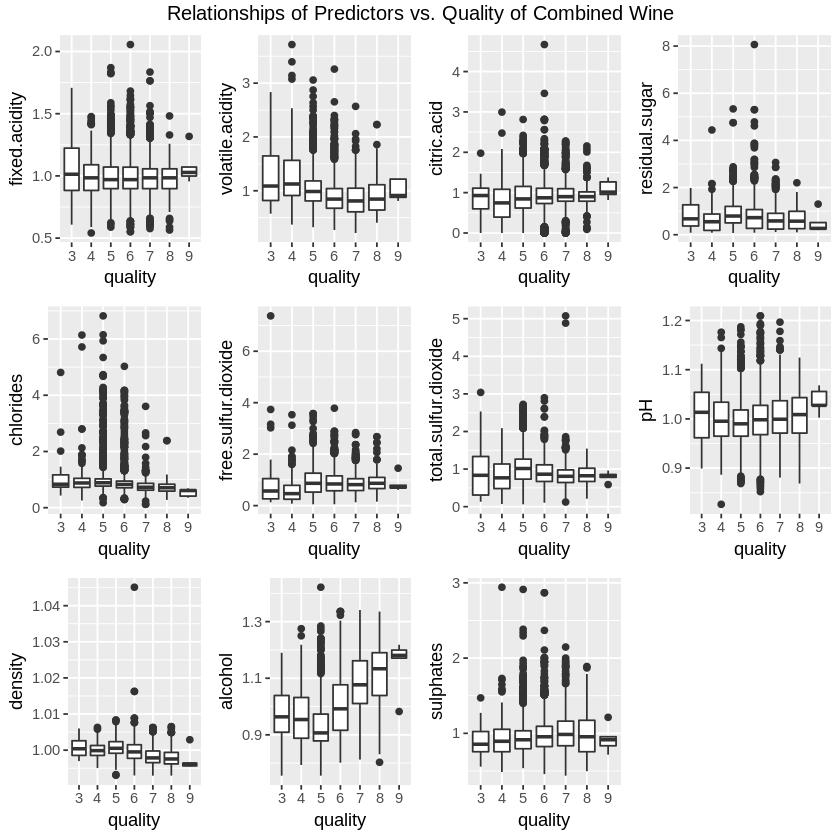

In [146]:
wine_quality_factor <- wine %>%
    mutate(quality = as.factor(quality))

plot_fa <- wine_quality_factor %>% 
    ggplot(aes(x = quality, y = fixed.acidity)) + 
    geom_boxplot()

plot_va <- wine_quality_factor %>% 
    ggplot(aes(x = quality, y = volatile.acidity)) +
    geom_boxplot()

plot_ca <- wine_quality_factor %>% 
    ggplot(aes(x = quality, y = citric.acid)) +
    geom_boxplot()

plot_rs <- wine_quality_factor %>%  
    ggplot(aes(x = quality, y = residual.sugar)) +
    geom_boxplot()

plot_cl <- wine_quality_factor %>% 
    ggplot(aes(x = quality, y = chlorides)) +
    geom_boxplot()

plot_fsd <- wine_quality_factor %>% 
    ggplot(aes(x = quality, y = free.sulfur.dioxide)) +
    geom_boxplot()

plot_tsd <- wine_quality_factor %>% 
    ggplot(aes(x = quality, y = total.sulfur.dioxide)) +
    geom_boxplot()

plot_ph <- wine_quality_factor %>%  
    ggplot(aes(x = quality, y = pH)) +
    geom_boxplot()

plot_den <- wine_quality_factor %>% 
    ggplot(aes(x = quality, y = density)) +
    geom_boxplot()

plot_alc <- wine_quality_factor %>% 
    ggplot(aes(x = quality, y = alcohol)) +
    geom_boxplot()

plot_sulp <- wine_quality_factor %>% 
    ggplot(aes(x = quality, y = sulphates)) +
    geom_boxplot()


grid.arrange(plot_fa, plot_va, plot_ca, plot_rs, plot_cl, plot_fsd, plot_tsd, plot_ph, plot_den, plot_alc, plot_sulp, ncol = 4, top = "Relationships of Predictors vs. Quality of Combined Wine")

None of the variables look exceedingly good to be predictors in the models, but since using volatile acidity, citric acid, and alcohol content improved both red and white wine models, we will use them as predictors in this case. 

Splitting the combined data set into training and test data set with and 80/20 split. 

In [155]:
set.seed(100)

training_set <- wine_scaled %>% 
    select(quality) %>% 
    unlist() %>% 
    createDataPartition(p = 0.80, list = FALSE)

X_train <- wine_scaled %>% 
    select(volatile.acidity, citric.acid, alcohol) %>% 
    slice(training_set) %>% 
    data.frame()

Y_train <- wine_scaled %>% 
    select(quality) %>% 
    slice(training_set) %>% 
    unlist()

X_test <- wine_scaled %>% 
    select(volatile.acidity, citric.acid, alcohol) %>% 
    slice(-training_set) %>% 
    data.frame()

Y_test <- wine_scaled %>% 
    select(quality) %>% 
    slice(-training_set) %>% 
    unlist()

In [156]:
set.seed(100)

train_control <- trainControl(method = "cv", number = 10)

k_wine = data.frame(k = seq(from = 1, to = 50, by = 1))

knn_wine <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k_wine, trControl = train_control)

knn_wine

k-Nearest Neighbors 

5199 samples
   3 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4679, 4679, 4680, 4679, 4679, 4680, ... 
Resampling results across tuning parameters:

  k   RMSE       Rsquared   MAE      
   1  0.8647516  0.2425061  0.5290018
   2  0.8215533  0.2315035  0.5828526
   3  0.7971382  0.2379727  0.5885409
   4  0.7842142  0.2420488  0.5910291
   5  0.7743487  0.2474980  0.5901628
   6  0.7679869  0.2498404  0.5871798
   7  0.7634344  0.2520441  0.5878551
   8  0.7592375  0.2561117  0.5863117
   9  0.7545929  0.2619046  0.5843439
  10  0.7523460  0.2644636  0.5830068
  11  0.7518035  0.2640172  0.5839906
  12  0.7511085  0.2642515  0.5838646
  13  0.7504325  0.2647320  0.5830975
  14  0.7493053  0.2661946  0.5817072
  15  0.7469350  0.2700567  0.5799726
  16  0.7456120  0.2717291  0.5787996
  17  0.7460765  0.2704980  0.5794473
  18  0.7451703  0.2718278  0.5788082
  19  0.7431915  0.2752358  0.5773760
  20  0.7428027  0.2

Using k=40 to form the final model. 

In [157]:
set.seed(100)

k_best <- data.frame(k = 40)
knn_wine <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k_best)
knn_wine

k-Nearest Neighbors 

5199 samples
   3 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 5199, 5199, 5199, 5199, 5199, 5199, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.7472189  0.2662734  0.5815424

Tuning parameter 'k' was held constant at a value of 40

Testing the final combined model on the test data. 

In [158]:
set.seed(100)

test <- predict(knn_wine, X_test)

predictions <- data.frame(obs = Y_test, pred = test)

test_error <- defaultSummary(predictions)
test_error

RMSE  Rsquared       MAE 
0.7521544 0.2690728 0.5878773

Combining the two wine data sets together gives an RMSPE of 0.7521 which is 0.45% worse than the of RMSPE of the model that uses all predictors on the white wine (0.7487) and 12.6% worse than the red wine model that uses the three predictors (0.6572). 

Combining the two data sets in an effort to make the model more accurate does not work. 

## Linear Regression

### Red Wine

First of all,use `ggpairs()` to get the relationships between each predictor and quality.

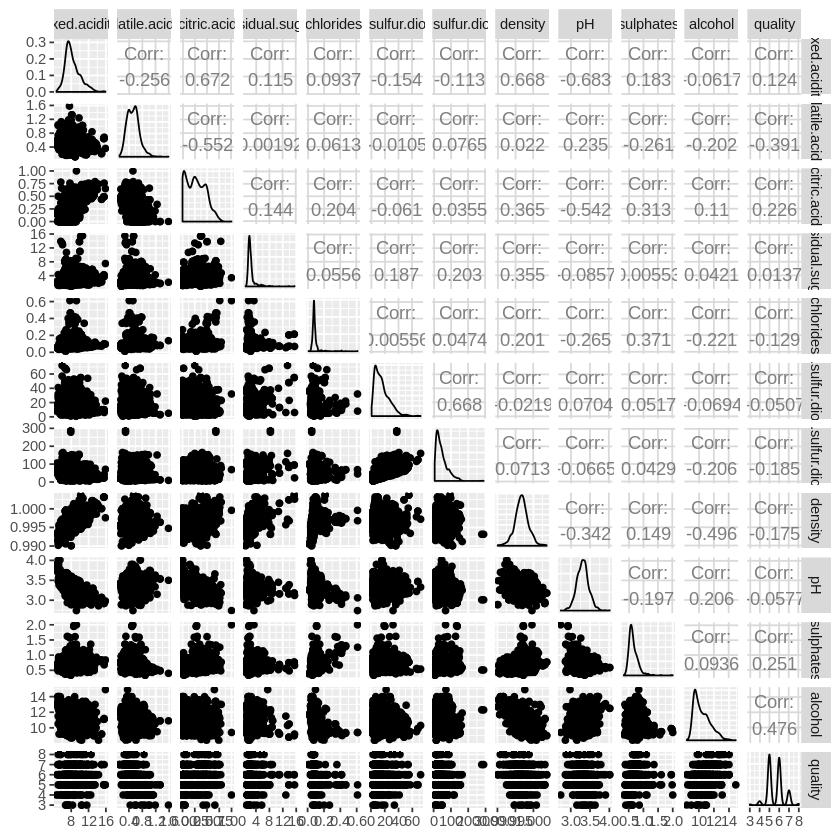

In [7]:
ggpairs(red_data)

From the table above, we can see that `volatile.acidity`,`sulphates` and `alcohol` have relatively high correlation(both negative and positive) with `quality` index of red wine.

Next, use linear regression model to get the coefficients of each predictors. 

Generate training set and test set:

In [6]:
r_training_set <- red_scaled %>% 
    select(quality) %>% 
    unlist() %>% 
    createDataPartition(p = 0.80, list = FALSE)

RX_train <- red_scaled %>% 
    select(-quality) %>% 
    slice(r_training_set) %>% 
    data.frame()

RY_train <- red_scaled %>% 
    select(quality) %>% 
    slice(r_training_set) %>% 
    unlist()

RX_test <- red_scaled %>% 
    select(-quality) %>% 
    slice(-r_training_set) %>% 
    data.frame()

RY_test <- red_scaled %>% 
    select(quality) %>% 
    slice(-r_training_set) %>% 
    unlist()

In [7]:
lm_reg_r <- train(x = RX_train, y = RY_train, method = "lm")
lm_coefs_r <- lm_reg_r$finalModel$coefficients %>% 
   t() %>%
  data.frame()
lm_coefs_r

X.Intercept.,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
29.39343,0.164331,-0.6272253,-0.04892171,0.05649911,-0.1517426,0.09023218,-0.1722785,-25.27902,-1.347462,0.5595277,2.954285


The best coefficients from red wine data is shown as above. 

The equation is: `quality` = 29.39343 + 0.164331*`fixed.acidity` - 0.6272253*`volatile.acidity` - 0.04892171*`citric.acid` +  0.05649911*`residual.sugar` + -0.1517426*`chlorides` + 0.09023218*`free.sulfur.dioxide` - 0.1722785*`total.sulfur.dioxide` - 25.27902*`density` - 1.347462*`pH` + 0.5595277*`sulphates` + 2.954285*`alcohol`alcohol

Finally, we compute the rmspe of this linear regression model.

In [8]:
test_pred_r <- predict(lm_reg_r, RX_test)
lm_modelvalues_r <- data.frame(obs = RY_test, pred = test_pred_r)
lm_mult_test_results_r <- defaultSummary(lm_modelvalues_r)
lm_rmspe_r <- lm_mult_test_results_r[1]
lm_rmspe_r

RMSE 
0.6111388

Red wine with chosen predictors

In [9]:
r_training_set <- red_scaled %>% 
    select(quality) %>% 
    unlist() %>% 
    createDataPartition(p = 0.80, list = FALSE)

RX_train <- red_scaled %>% 
    select(volatile.acidity, citric.acid, alcohol) %>% 
    slice(r_training_set) %>% 
    data.frame()

RY_train <- red_scaled %>% 
    select(quality) %>% 
    slice(r_training_set) %>% 
    unlist()

RX_test <- red_scaled %>% 
    select(volatile.acidity, citric.acid, alcohol) %>% 
    slice(-r_training_set) %>% 
    data.frame()

RY_test <- red_scaled %>% 
    select(quality) %>% 
    slice(-r_training_set) %>% 
    unlist()

In [10]:
lm_reg_r <- train(x = RX_train, y = RY_train, method = "lm")
lm_coefs_r <- lm_reg_r$finalModel$coefficients %>% 
   t() %>%
  data.frame()
lm_coefs_r

X.Intercept.,volatile.acidity,citric.acid,alcohol
3.096433,-0.736092,0.0138929,3.241467


In [17]:
test_pred_r <- predict(lm_reg_r, RX_test)
lm_modelvalues_r <- data.frame(obs = RY_test, pred = test_pred_r)
lm_mult_test_results_r <- defaultSummary(lm_modelvalues_r)
lm_rmspe_r <- lm_mult_test_results_r[1]
lm_rmspe_r


RMSE 
0.6587831

The rmspe of linear regression red wine model with all variable is: 0.758

### White Wine 

We will do the same analysis on white wine data. First, set up training set and test set.

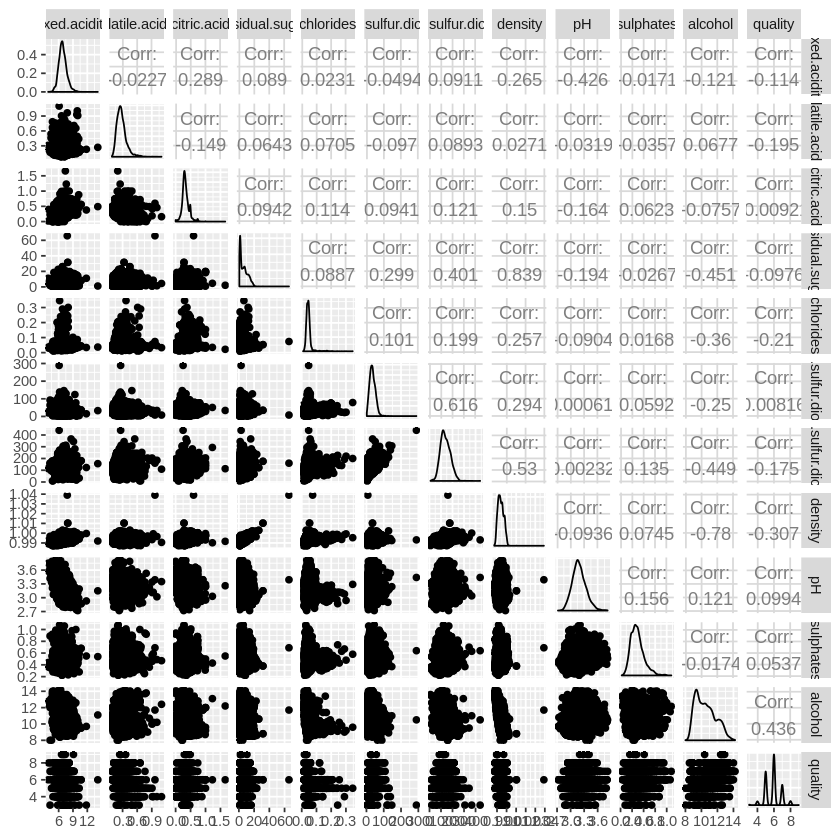

In [13]:
white_plot <- white_data %>%
    ggpairs()
white_plot

From the table above, we can see that `chlorides`,`density` and `alcohol` have relatively high correlation with `quality` of white wine.

In [12]:
w_training_set <- white_scaled %>% 
    select(quality) %>% 
    unlist() %>% 
    createDataPartition(p = 0.80, list = FALSE)

WX_train <- white_scaled %>% 
    select(-quality) %>% 
    slice(w_training_set) %>% 
    data.frame()

WY_train <- white_scaled %>% 
    select(quality) %>% 
    slice(w_training_set) %>% 
    unlist()

WX_test <- white_scaled %>% 
    select(-quality) %>% 
    slice(-w_training_set) %>% 
    data.frame()

WY_test <- white_scaled %>% 
    select(quality) %>% 
    slice(-w_training_set) %>% 
    unlist()

In [13]:
lm_reg_w <- train(x = WX_train, y = WY_train, method = "lm")
lm_coefs_w <- lm_reg_w$finalModel$coefficients %>% 
   t() %>%
  data.frame()
lm_coefs_w

X.Intercept.,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
144.9611,0.34407,-0.5695284,0.01537298,0.6468946,-0.05028594,0.1320934,-0.05297706,-143.9147,2.082308,0.3512666,2.056186


The equation for white wine quality is: `quality` = 144.9611 + 0.34407*`fixed.acidity` - 0.5695284*`volatile.acidity` - 0.01537298*`citric.acid` +  0.6468946*`residual.sugar`  - 0.05028594*`chlorides` + 0.1320934*`free.sulfur.dioxide` - 0.05297706*`total.sulfur.dioxide` - 143.9147*`density` + 2.082308*`pH` + 0.3512666*`sulphates` + 2.056186
*`alcohol`

In [18]:
test_pred_w <- predict(lm_reg_w, WX_test)
lm_modelvalues_w <- data.frame(obs = WY_test, pred = test_pred_w)
lm_mult_test_results_w <- defaultSummary(lm_modelvalues_w)
lm_rmspe_w<-lm_mult_test_results_w[1]
lm_rmspe_w


RMSE 
0.7577975

The rmspe of linear regression white wine model with all variable is: 0.758

White wine with selected predictors. 

In [203]:
w_training_set <- white_scaled %>% 
    select(quality) %>% 
    unlist() %>% 
    createDataPartition(p = 0.80, list = FALSE)

WX_train <- white_scaled %>% 
    select(residual.sugar, density, alcohol) %>% 
    slice(w_training_set) %>% 
    data.frame()

WY_train <- white_scaled %>% 
    select(quality) %>% 
    slice(w_training_set) %>% 
    unlist()

WX_test <- white_scaled %>% 
    select(residual.sugar, density, alcohol) %>% 
    slice(-w_training_set) %>% 
    data.frame()

WY_test <- white_scaled %>% 
    select(quality) %>% 
    slice(-w_training_set) %>% 
    unlist()

In [204]:
lm_reg_w <- train(x = WX_train, y = WY_train, method = "lm")
lm_coefs_w <- lm_reg_w$finalModel$coefficients %>% 
   t() %>%
  data.frame()
lm_coefs_w

X.Intercept.,residual.sugar,density,alcohol
94.01216,0.4319463,-90.97611,2.509392


In [205]:
test_pred_w <- predict(lm_reg_w, WX_test)
lm_modelvalues_w <- data.frame(obs = WY_test, pred = test_pred_w)
lm_mult_test_results_w <- defaultSummary(lm_modelvalues_w)
lm_rmspe_w<-lm_mult_test_results_w[1]
lm_rmspe_w

RMSE 
0.7554357

 %% creates a visualization of the classification, regression  or clustering analysis 

## Classification

We will start off by creating two classes from our quality predictor. We will divide the quality into two classes Good(>5) and Bad(<=5). We choose this particular divider since it helps produce a more balanced dataset.

In [6]:
divider<-5
red_data<-red_data %>% 
    mutate(SO_ratio = free.sulfur.dioxide/total.sulfur.dioxide) %>% 
    mutate(class = ifelse(quality > divider, "Good", "Bad")) %>%
    mutate(class = as.factor(class)) %>% 
    select(-quality,-free.sulfur.dioxide,-total.sulfur.dioxide)
head(red_data)
white_data<-white_data %>% 
    mutate(SO_ratio = free.sulfur.dioxide/total.sulfur.dioxide) %>% 
    mutate(class = ifelse(quality > divider, "Good", "Bad")) %>%
    mutate(class = as.factor(class)) %>% 
    select(-quality,-free.sulfur.dioxide,-total.sulfur.dioxide)
head(white_data)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,density,pH,sulphates,alcohol,SO_ratio,class
7.4,0.70,0.00,1.9,0.076,0.9978,3.51,0.56,9.4,0.3235294,Bad
7.8,0.88,0.00,2.6,0.098,0.9968,3.20,0.68,9.8,0.3731343,Bad
7.8,0.76,0.04,2.3,0.092,0.9970,3.26,0.65,9.8,0.2777778,Bad
11.2,0.28,0.56,1.9,0.075,0.9980,3.16,0.58,9.8,0.2833333,Good
7.4,0.70,0.00,1.9,0.076,0.9978,3.51,0.56,9.4,0.3235294,Bad
7.4,0.66,0.00,1.8,0.075,0.9978,3.51,0.56,9.4,0.3250000,Bad


fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,density,pH,sulphates,alcohol,SO_ratio,class
7.0,0.27,0.36,20.7,0.045,1.0010,3.00,0.45,8.8,0.2647059,Good
6.3,0.30,0.34,1.6,0.049,0.9940,3.30,0.49,9.5,0.1060606,Good
8.1,0.28,0.40,6.9,0.050,0.9951,3.26,0.44,10.1,0.3092784,Good
7.2,0.23,0.32,8.5,0.058,0.9956,3.19,0.40,9.9,0.2526882,Good
7.2,0.23,0.32,8.5,0.058,0.9956,3.19,0.40,9.9,0.2526882,Good
8.1,0.28,0.40,6.9,0.050,0.9951,3.26,0.44,10.1,0.3092784,Good


In [7]:
# Rough distribution of the data
red_data %>% 
    group_by(class) %>%
    summarize(n = n())

white_data %>%
    group_by(class) %>%
    summarize(n=n())

class,n
Bad,744
Good,855


class,n
Bad,1640
Good,3258


### Modeling red wine dataset using all predictors

k-Nearest Neighbors 

1200 samples
  10 predictor
   2 classes: 'Bad', 'Good' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1080, 1080, 1080, 1080, 1080, 1080, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.7683365  0.5329327
   3  0.7482737  0.4924508
   5  0.7349474  0.4644894
   7  0.7341071  0.4643104
   9  0.7291416  0.4533231
  11  0.7249612  0.4451470
  13  0.7307323  0.4564152
  17  0.7316069  0.4581785
  19  0.7249540  0.4448316
  23  0.7299403  0.4560498
  29  0.7274266  0.4512253
  31  0.7265865  0.4496722
  37  0.7282463  0.4530485

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 1.

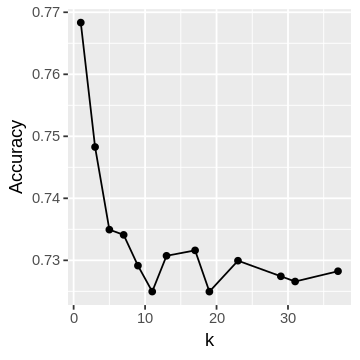

In [8]:
# fixed.acidity, pH
red_scaled_data <- red_data %>% 
    select(-class) %>% map_df(scale) %>% # scale everything but class
    mutate(class = red_data$class) # add class back to dataset

# Setting up training and testing Data for Red Wine
set.seed(1234)
training_rows_red <- red_scaled_data %>% 
  select(class) %>% 
  unlist() %>% # converts Class from a tibble to a vector
  createDataPartition(p = 0.75, list = FALSE)

training_set_red <- red_scaled_data %>% slice(training_rows_red)
testing_set_red <- red_scaled_data %>% slice(-training_rows_red)

red_X_train<-training_set_red %>% select(-class) %>% as.data.frame()
red_Y_train<-training_set_red %>% select(class) %>% unlist()
red_X_test<-testing_set_red %>% select(-class) %>% as.data.frame()
red_Y_test<-testing_set_red %>% select(class) %>% unlist()

# Determining k for knn
ks <- data.frame(k=c(1,3,5,7,9,11,13,17,19,23,29,31,37))
train_control <- trainControl(method="cv", number=10)
set.seed(1234)
choose_k <- train(x = red_X_train, y = red_Y_train, method = "knn", tuneGrid = ks, trControl = train_control)

choose_k
options(repr.plot.width = 3, repr.plot.height = 3)
choose_k_plot <- choose_k$results %>% 
    ggplot(aes(x=k,y=Accuracy)) +
    geom_point()+
    geom_line()
choose_k_plot

#### Modeling after choosing k

In [9]:
k = data.frame(k = 1)
model_knn <- train(x = red_X_train, y = red_Y_train, method = "knn", tuneGrid = k)
model_knn

red_Y_test_predicted <- predict(object = model_knn, red_X_test)

model_quality <- confusionMatrix(data = red_Y_test_predicted, reference = red_Y_test)
model_quality$overall[1]

k-Nearest Neighbors 

1200 samples
  10 predictor
   2 classes: 'Bad', 'Good' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 1200, 1200, 1200, 1200, 1200, 1200, ... 
Resampling results:

  Accuracy   Kappa    
  0.7454285  0.4868277

Tuning parameter 'k' was held constant at a value of 1

Accuracy 
0.7518797

### Modeling red wine dataset using select predictors

Alongside the predictors that look good on the red wine data: volatile acidity, citric acidity, and alcohol, we will also utilise the sulphates and free sulphur dioxide ratio (SO_ratio) 

k-Nearest Neighbors 

1200 samples
   5 predictor
   2 classes: 'Bad', 'Good' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1080, 1080, 1080, 1080, 1080, 1080, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.7375101  0.4728472
   3  0.7350096  0.4678511
   5  0.7458293  0.4901748
   7  0.7524474  0.5025891
   9  0.7432876  0.4848028
  11  0.7541281  0.5064095
  13  0.7441211  0.4865739
  17  0.7407533  0.4800622
  19  0.7374612  0.4733882
  23  0.7374681  0.4727306
  29  0.7407461  0.4798585
  31  0.7415654  0.4811798
  37  0.7374197  0.4733377

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 11.

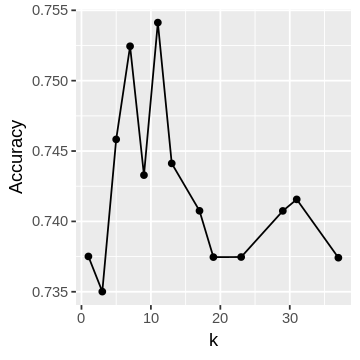

In [10]:
red_scaled_data <- red_data %>% 
    select(-density, -fixed.acidity, -pH, -residual.sugar, -chlorides) %>% 
    select(-class) %>% map_df(scale) %>% # scale everything but class
    mutate(class = red_data$class) # add class back to dataset
# Setting up training and testing Data for Red Wine
set.seed(1234)
training_rows_red <- red_scaled_data %>% 
  select(class) %>% 
  unlist() %>% # converts Class from a tibble to a vector
  createDataPartition(p = 0.75, list = FALSE)

training_set_red <- red_scaled_data %>% slice(training_rows_red)
testing_set_red <- red_scaled_data %>% slice(-training_rows_red)

red_X_train<-training_set_red %>% select(-class) %>% as.data.frame()
red_Y_train<-training_set_red %>% select(class) %>% unlist()
red_X_test<-testing_set_red %>% select(-class) %>% as.data.frame()
red_Y_test<-testing_set_red %>% select(class) %>% unlist()

# Determining k for knn
ks <- data.frame(k=c(1,3,5,7,9,11,13,17,19,23,29,31,37))
train_control <- trainControl(method="cv", number=10)
set.seed(1234)
choose_k <- train(x = red_X_train, y = red_Y_train, method = "knn", tuneGrid = ks, trControl = train_control)

choose_k
options(repr.plot.width = 3, repr.plot.height = 3)
choose_k_plot <- choose_k$results %>% 
    ggplot(aes(x=k,y=Accuracy)) +
    geom_point()+
    geom_line()
choose_k_plot

### Modeling after choosing k

In [11]:
k = data.frame(k = 21)
model_knn <- train(x = red_X_train, y = red_Y_train, method = "knn", tuneGrid = k)
model_knn

red_Y_test_predicted <- predict(object = model_knn, red_X_test)

model_quality <- confusionMatrix(data = red_Y_test_predicted, reference = red_Y_test)
model_quality$overall[1]

k-Nearest Neighbors 

1200 samples
   5 predictor
   2 classes: 'Bad', 'Good' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 1200, 1200, 1200, 1200, 1200, 1200, ... 
Resampling results:

  Accuracy   Kappa    
  0.7201004  0.4384176

Tuning parameter 'k' was held constant at a value of 21

Accuracy 
0.7443609

So looks like choosing only a subset of predictors is not too great! Our Accuracy has gone down by 0.75%. Since we want to avoid trying all combinations of predictors, let's end our discussion here and start working on the white wine dataset.

#### Modeling white wine dataset using all predictors

k-Nearest Neighbors 

3674 samples
  10 predictor
   2 classes: 'Bad', 'Good' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 3307, 3307, 3306, 3306, 3307, 3306, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.7901530  0.5298855
   3  0.7504117  0.4289963
   5  0.7572244  0.4390230
   7  0.7651085  0.4551659
   9  0.7640253  0.4534966
  11  0.7659378  0.4572960
  13  0.7637528  0.4484845
  17  0.7621194  0.4420669
  19  0.7653832  0.4468519
  23  0.7542227  0.4169535
  29  0.7572214  0.4214361
  31  0.7610288  0.4300902
  37  0.7632093  0.4352531

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 1.

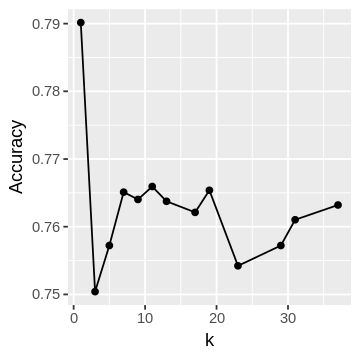

In [12]:
# fixed.acidity, pH
white_scaled_data <- white_data %>% 
    select(-class) %>% map_df(scale) %>% # scale everything but class
    mutate(class = white_data$class) # add class back to dataset

# Setting up training and testing Data for Red Wine
set.seed(1234)
training_rows_white <- white_scaled_data %>% 
  select(class) %>% 
  unlist() %>% # converts Class from a tibble to a vector
  createDataPartition(p = 0.75, list = FALSE)

training_set_white <- white_scaled_data %>% slice(training_rows_white)
testing_set_white <- white_scaled_data %>% slice(-training_rows_white)

white_X_train<-training_set_white %>% select(-class) %>% as.data.frame()
white_Y_train<-training_set_white %>% select(class) %>% unlist()
white_X_test<-testing_set_white %>% select(-class) %>% as.data.frame()
white_Y_test<-testing_set_white %>% select(class) %>% unlist()

# Determining k for knn
ks <- data.frame(k=c(1,3,5,7,9,11,13,17,19,23,29,31,37))
train_control <- trainControl(method="cv", number=10)
set.seed(1234)
choose_k <- train(x = white_X_train, y = white_Y_train, method = "knn", tuneGrid = ks, trControl = train_control)

choose_k
options(repr.plot.width = 3, repr.plot.height = 3)
choose_k_plot <- choose_k$results %>% 
    ggplot(aes(x=k,y=Accuracy)) +
    geom_point()+
    geom_line()
choose_k_plot

#### Modeling after choosing k

In [14]:
k = data.frame(k = 1)
set.seed(5678)
model_knn <- train(x = white_X_train, y = white_Y_train, method = "knn", tuneGrid = k)
model_knn

white_Y_test_predicted <- predict(object = model_knn, white_X_test)

model_quality <- confusionMatrix(data = white_Y_test_predicted, reference = white_Y_test)
model_quality$overall[1]

k-Nearest Neighbors 

3674 samples
  10 predictor
   2 classes: 'Bad', 'Good' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 3674, 3674, 3674, 3674, 3674, 3674, ... 
Resampling results:

  Accuracy  Kappa    
  0.76356   0.4677334

Tuning parameter 'k' was held constant at a value of 1

Accuracy 
0.7965686

#### Modeling white wine dataset using select predictors

k-Nearest Neighbors 

3674 samples
   3 predictor
   2 classes: 'Bad', 'Good' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 3307, 3307, 3306, 3306, 3307, 3306, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.7585861  0.4577165
   3  0.7196533  0.3530618
   5  0.7169293  0.3393144
   7  0.7218354  0.3509488
   9  0.7316276  0.3713436
  11  0.7264572  0.3569266
  13  0.7221079  0.3443684
  17  0.7259159  0.3527300
  19  0.7207507  0.3427384
  23  0.7237420  0.3496510
  29  0.7182961  0.3345651
  31  0.7174787  0.3329624
  37  0.7180251  0.3318078

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 1.

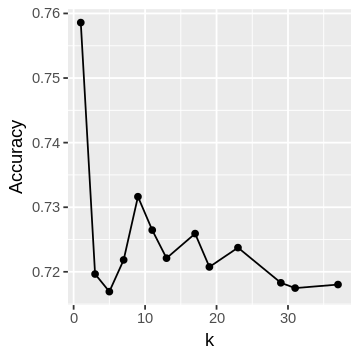

In [16]:
# fixed.acidity, pH
white_scaled_data <- white_data %>% 
    select(residual.sugar, density, alcohol, class) %>% 
    select(-class) %>% map_df(scale) %>% # scale everything but class
    mutate(class = white_data$class) # add class back to dataset

# Setting up training and testing Data for Red Wine
set.seed(1234)
training_rows_white <- white_scaled_data %>% 
  select(class) %>% 
  unlist() %>% # converts Class from a tibble to a vector
  createDataPartition(p = 0.75, list = FALSE)

training_set_white <- white_scaled_data %>% slice(training_rows_white)
testing_set_white <- white_scaled_data %>% slice(-training_rows_white)

white_X_train<-training_set_white %>% select(-class) %>% as.data.frame()
white_Y_train<-training_set_white %>% select(class) %>% unlist()
white_X_test<-testing_set_white %>% select(-class) %>% as.data.frame()
white_Y_test<-testing_set_white %>% select(class) %>% unlist()

# Determining k for knn
ks <- data.frame(k=c(1,3,5,7,9,11,13,17,19,23,29,31,37))
train_control <- trainControl(method="cv", number=10)
set.seed(1234)
choose_k <- train(x = white_X_train, y = white_Y_train, method = "knn", tuneGrid = ks, trControl = train_control)

choose_k
options(repr.plot.width = 3, repr.plot.height = 3)
choose_k_plot <- choose_k$results %>% 
    ggplot(aes(x=k,y=Accuracy)) +
    geom_point()+
    geom_line()
choose_k_plot

#### Modelling after choosing k

In [17]:
k = data.frame(k = 1)
set.seed(5678)
model_knn <- train(x = white_X_train, y = white_Y_train, method = "knn", tuneGrid = k)
model_knn

white_Y_test_predicted <- predict(object = model_knn, white_X_test)

model_quality <- confusionMatrix(data = white_Y_test_predicted, reference = white_Y_test)
model_quality$overall[1]

k-Nearest Neighbors 

3674 samples
   3 predictor
   2 classes: 'Bad', 'Good' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 3674, 3674, 3674, 3674, 3674, 3674, ... 
Resampling results:

  Accuracy   Kappa    
  0.7313114  0.3949976

Tuning parameter 'k' was held constant at a value of 1

Accuracy 
0.745098

So looks like choosing only a subset of predictors is not too great here either! Our Accuracy has gone down by 5.2%. Again, since we want to avoid trying all combinations of predictors, lets conclude here and state our observations.

We will conclude our classification modeling by noting our observations for both the red and white wine dataset.
Our observations for both datasets is very similar.
* The classification model does not produce a very accurate model (around 75-80%) 
    - Seems like flattening our dataset to only use two classes (Good and Bad) does not help produce a good accuracy model
   
* Using all the predictors produces a better model than using a subset of the predictors
    - Seems like each predictor has a contribution to the quality of the wine

## Discussion

#### Summary of findings

- KNN regression

For KNN regression on red wine, we found that choosing predictors that looked good performed better than the regression models that used all the variables and the model that trained on the balanced data set. For knn regression on white wine, we found the opposite of red wine, that is choosing the variables that seemed good to use as predictors actually made the accuracy worse. The best model for the white wine turned out to be the one that used every single scaled variable as predictors. The exploration into modeling on a combined wine data set showed that it performs just slightly worse than the best white wine model, and much worse compared to the red wine model.

- Linear regression 

- Classification

For KNN Classification on both red and white wine, we found that choosing all predictors for modelling produces a much better classifier than selecting only a few special ones. Another interesting find was that classifying using just two classes does not produce a very accurate model given this dataset. This could be attributed to many things such as (1) unbalanced data between the quality levels, (2) the normal distribution of the dataset over the quality index or (3) oversimplifying the quality index into two classes, which might diminish the quality of the dataset itself. Although the accuracy of the model is not very high, it's high enough to conclude that wine quality is not just based on the human pallete but it's physicochemical properties, which definitely tells us that there is such a thing as "objectively good" wine and "objectively bad" wine.


#### Discussion on excpected and unexpected results

- KNN regression

    There were some expected and unexpected things that happened among the data sets. The modeling on the red wine data set followed exactly what we expected, that is the model that uses the predictors that look best performed the best. This makes sense and as the one would think that using the best predictors makes the best model. The modeling done on the white wine data set is the oppsosite of the red wine data set. The predictors that we thought would work the best made a worse model than using every single predictor. The most likely explanation for this is that there is some underlyting pattern in the data set that is not visible in the exploratory data analysis. There could exist a selection of predictors that has a better accuracy than our model that uses all predictors, but that would require exhausting all possible combinations of predictors (which is a lot) or perhaps use some other data analysis technique that we do not know of. However, going to such lengths to find the perfect model would likely not give us a substantial boost to our accuracy to our model (like 50%), but would rather give us something comparable to a 5-10% improvement, so we can rest assured that our best model is quite good. Additionally, balancing all the qualities in the white wine data set to the most common quality and then training the all predictors model on it made it less accurate than the model that trained on the unbalanced data set. This is probably because balancing all the classes created so many extra data points that the model became very good at predicting those values, but not values that is has not seen before. Finally, the model that trained on the combined data set performed worse than both of the red and white wine models. Since we assumed that red and white wine have actually differences within them, this is an expected result as combining the data sets would dilute any aforementioned uniquness in the data sets. 


- Linear regression  

  From the `ggpairs()` table of red wine above, we can see that `volatile.acidity`(-0.391),`sulphates`(0.251) and `alcohol`(0.476) have relatively high correlation with `quality`. However, in the final model, the coefficients of these predictors are -0.627, 0.559 amd 2.959 respectively.However, the coefficient of `density` is -25.279, which is an unexpected results. The `X.intercept` also influences the quality prediction more significant than most of the predictors, with the figure of 29.393. Other coefficients ranges from -1 to 3. By comparing these coefficients, we can see that the quality is mostly impacted by the data of density, which other predictors have minor contributes to the quality of red wine. The reason that density could be an effective predictor is that from the box plot of the `density` versus `quality` box plot, we can see that the data of density changes from 0.990 to 1.004 (both before and after scaling), which makes density data sensitive to quality changes(i.e. a extremely small change in density could result in a quality level change distinctly).

  Similarly, in the white wine dataset, although `chlorides`(-0.21),`density`(-0.307) and `alcohol`(0.436) have relatively high correlation, the coefficients of `density` still dramatically higher than others(-143.9147). The `X.intercept` is 144.96, while other coefficients range from -1 to 3. 

  Based on the results of linear regression models of red wine and white wine combined with the box plot, we can conclude that these two wines have different models to estimates quality based on their physicochemical properties. However, the difference is minor. Wine density has strong negative linear relation with wine quality.
  

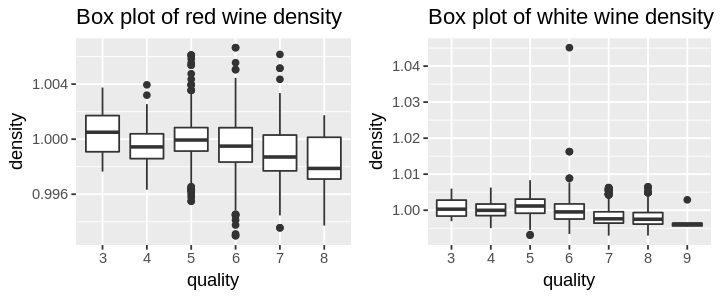

In [33]:
options(repr.plot.width = 6, repr.plot.height = 2.5)
plot_den_scaled_r <- red_scaled %>% 
    mutate(quality = as.factor(quality)) %>%
    ggplot(aes(x = quality, y = density)) +
    geom_boxplot() +
    ggtitle("Box plot of red wine density")
plot_den_scaled_w <- white_scaled %>% 
    mutate(quality = as.factor(quality)) %>%
    ggplot(aes(x = quality, y = density)) +
    geom_boxplot() +
    ggtitle("Box plot of white wine density")
density_boxplot_scaled <- grid.arrange(plot_den_scaled_r,plot_den_scaled_w, ncol =2)

- KNN Classfication
    
    This avenue of modeling was indeed surprising, looking at the correlation between the predictors and the quality definitely gave the idea that only a select few of the predictors actually affected the dataset in predicting the quality. But as the model suggests, using all predictors in unison actually helps build a better classifier for both the red wine and white wine dataset than using just the predictors that we thought were ideal by looking at the box plots. Although we definitely simplified our analysis by partitioning the quality value into two halves, we did not expect such a large change in the results. Another surprise was that simplifying the dataset in such a way, definitely gave us the idea that our model would perform very accurately, we definitely thought it was going to be in the high 80's and low 90's. But after some additional speculation, it made sense that this was the case, since our data was distributed over the quality value in a very normal fashion, i.e. more data points in the `5-7` quality range, which could have contributed this accuracy dip since we created the `Good` and `Bad` classifier by dividing the dataset with the quality value at greater than 5 and less than or equal to 5 respectively, thus thinning the gap between the "Good" and "Bad" wine and leading to a less accurate model.

#### Possible impacts

  In the wine making industry, wine makers need the help pf wine tasters or some specialists to evalute the quality of wine they made, which requires extra expenditure and time. However, getting the physicochemical properties of wine is easy. If a effective and accurate quality estimation model is used, wine makers can easily get the predicted wine quality with less money and time spent.
  On the other hand, wine producers can improve the quality of wine based on the linear regression model. Fro example, the coefficient of `density` is relatively larger, therefore, it is convincing that wine with higher density might have higher quality. Wine peoducers can improve the quality of wine by increasing its density.

#### Future questions to ask
  
  Further research might be finding other models that can be more accurately estimate the quality of wine based on these physicochemical properties. Another avenue could be using other chemical properties of the wine, to create wine quality modellers.

### References

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009. 

Wikipedia contributors. (2019, February 12). Wine. In Wikipedia, The Free Encyclopedia. Retrieved 10:38, March 2, 2019, from https://en.wikipedia.org/w/index.php?title=Wine&oldid=882957942

Statistics Canada. “Control and Sale of Alcoholic Beverages, Year Ending March 31, 2016.” The Daily - , 2 May 2017, Retrieved April 4, 2019, from https://www150.statcan.gc.ca/n1/daily-quotidien/170502/dq170502a-eng.htm

Wu, Yiyao. “Conditions and Growing Environment - Factors That Influence Wine - WSET Level 2.” Decanter, 5 Feb. 2016, Retrieved April 4, 2019, from www.decanter.com/learn/wset/factors-that-influence-wine-conditions-and-growing-environment-wset-level-2-282900/.